## Boston Housing Price Prediction 
the Housing Dataset, which contains information about houses in the
suburbs of Boston collected by D. Harrison and D.L. Rubinfeld in 1978.
Attributes:
<pre>
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's
</pre>

Correlation Matrix

\begin{equation}
r=\frac{\sum_{i=1}^n[(X^{(i)}-\mu_{x}) (y^{(i)}-\mu_{y})]}{\sqrt{\sum_{i=1}^n(X^{(i)}-\mu_{x})^2}\sqrt{\sum_{i=1}^n(y^{(i)}-\mu_{y})^2}}  = \frac{\sigma_{xy}}{\sigma_{x}\sigma{y}}
\end{equation}

In [1]:
import pandas as pd

df = pd.read_csv('./Datasets/housing.data', header=None, sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


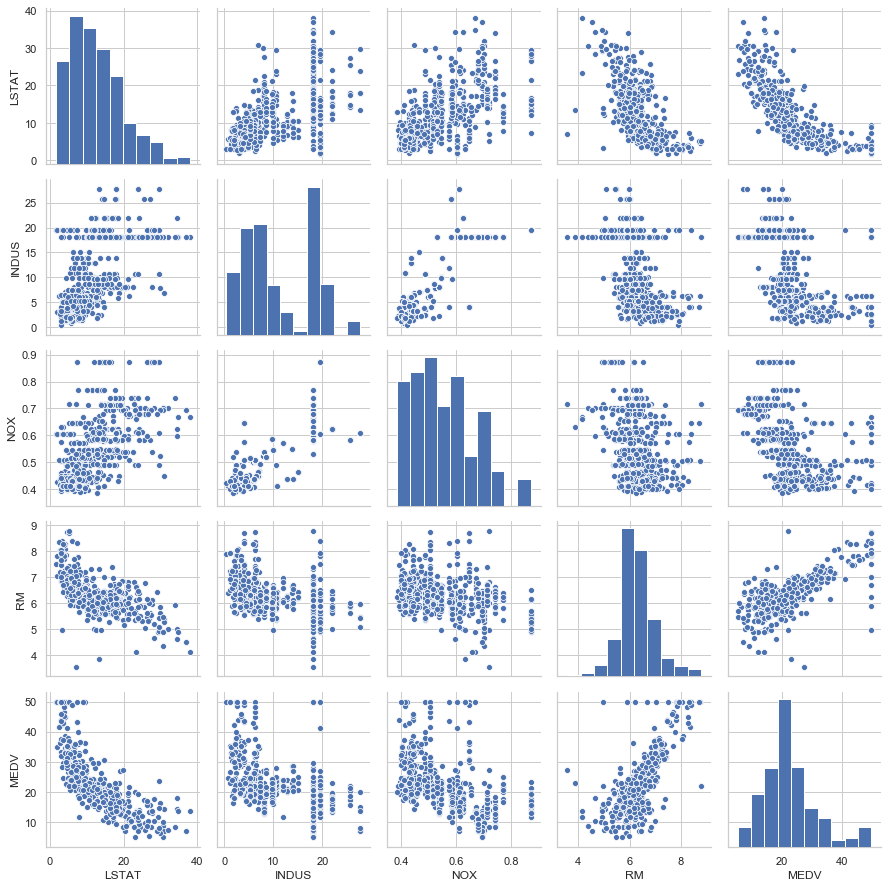

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
plt.show()

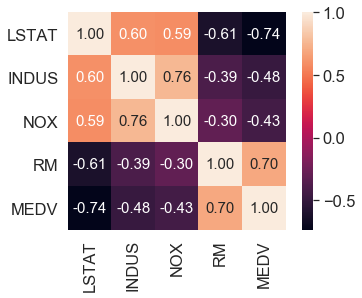

In [3]:
import numpy as np


cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.show()

In [4]:
from sklearn.linear_model import LinearRegression

X = df[['RM']].values
y = df['MEDV'].values

slr = LinearRegression()
slr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='lightblue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)    
    return

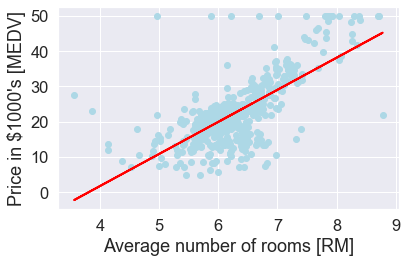

In [6]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.tight_layout()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



In [10]:
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

print ('Residual sum of squares Train: %.2f' % np.mean((slr.predict(X_train)- y_train) ** 2))
print ('Residual sum of squares Test: %.2f' % np.mean((slr.predict(X_test)- y_test) ** 2))

Residual sum of squares Train: 42.16
Residual sum of squares Test: 47.03


In [11]:
X = df[['RM','LSTAT']].values
y = df['MEDV'].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

print ('Residual sum of squares Train: %.2f' % np.mean((slr.predict(X_train)- y_train) ** 2))
print ('Residual sum of squares Test: %.2f' % np.mean((slr.predict(X_test)- y_test) ** 2))

Residual sum of squares Train: 29.59
Residual sum of squares Test: 32.73


In [13]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [14]:
def PolynomialRegression(degree):
    
    
    X = df[['RM']].values
    y = df['MEDV'].values
    
    quadratic_featurizer = PolynomialFeatures(degree)
    X_quadratic = quadratic_featurizer.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_quadratic, y, test_size=0.3, random_state=0)
    
    regressor_quadratic = LinearRegression()
    regressor_quadratic.fit(X_train, y_train)
        
    print ('Residual sum of squares: %.2f' % np.mean(( regressor_quadratic.predict(X_train)- y_train) ** 2))
    print ('Residual sum of squares: %.2f' % np.mean(( regressor_quadratic.predict(X_test)- y_test) ** 2))
        

In [15]:
from IPython.html import widgets
from IPython.html.widgets import interact
from IPython.display import display

/opt/anaconda3/lib/python3.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)



\begin{equation}
  RSS_{\beta}=\sum_{i=1}^{n} \left({y_{i}-\beta_i X_{i})}\right)^{2} 
\end{equation}



In [16]:
i = interact(PolynomialRegression, degree=(1,100))

interactive(children=(IntSlider(value=50, description='degree', min=1), Output()), _dom_classes=('widget-inter…

## Regularization Techniques

In [26]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
url = './Datasets/communities.data.txt'
crime = pd.read_csv(url, header=None, na_values=['?'])
crime.head()
#crime.shape

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [18]:
# remove categorical features
crime.drop([0, 1, 2, 3, 4], axis=1, inplace=True)

# remove rows with any missing values
crime.dropna(inplace=True)

# check the shape
crime.shape

(319, 123)

In [19]:
X = crime.drop(127, axis=1)
y = crime[127]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [22]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
print (linreg.coef_)

[-3.66188167e+00  6.98124465e-01 -2.61955467e-01 -2.85270027e-01
 -1.64740837e-01  2.46972333e-01 -1.09290051e+00 -5.96857796e-01
  1.11200239e+00 -7.21968931e-01  4.27346598e+00 -2.28040268e-01
  8.04875769e-01 -2.57934732e-01 -2.63458023e-01 -1.04616958e+00
  6.07784197e-01  7.73552561e-01  5.96468029e-02  6.90215922e-01
  2.16759430e-02 -4.87802949e-01 -5.18858404e-01  1.39478815e-01
 -1.24417942e-01  3.15003821e-01 -1.52633736e-01 -9.65003927e-01
  1.17142163e+00 -3.08546690e-02 -9.29085548e-01  1.24654586e-01
  1.98104506e-01  7.30804821e-01 -1.77337294e-01  8.32927588e-02
  3.46045601e-01  5.01837338e-01  1.57062958e+00 -4.13478807e-01
  1.39350802e+00 -3.49428114e+00  7.09577818e-01 -8.32141352e-01
 -1.39984927e+00  1.02482840e+00  2.13855006e-01 -6.18937325e-01
  5.28954490e-01  7.98294890e-02  5.93688560e-02 -1.68582667e-01
  7.31264051e-01 -1.39635208e+00  2.38507704e-01  5.50621439e-01
 -5.61447867e-01  6.18989764e-01  2.55517024e+00 -3.71769599e+00
  7.09191935e-01  3.82041

In [28]:
y_pred = linreg.predict(X_test)

In [29]:
# calculate RMSE
from sklearn import metrics
import numpy as np
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.233813676494869


In [30]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.23381367649479326


In [31]:
ridgereg = Ridge(alpha=0.1, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.1642790680492407


In [32]:
print (ridgereg.coef_)

[-4.00298418e-03  3.51647445e-02  6.03535935e-02 -7.68532502e-02
 -1.76099849e-02  4.53791433e-02  8.81586468e-03 -2.88885814e-02
 -1.92143587e-02  3.36122201e-02  5.71590736e-04 -4.85438136e-02
  5.55725157e-02 -1.15934270e-01 -1.11880845e-01 -3.32742094e-01
 -1.12302031e-02  9.63833243e-02 -8.92057732e-02  8.42691702e-02
 -1.67246717e-02  7.42520308e-03 -1.21294025e-01 -6.70155789e-02
 -1.74250249e-03  1.69446833e-01  3.18217654e-02 -1.00209834e-01
  3.97535644e-02 -1.19173054e-01 -1.04445267e-01 -5.14946676e-03
  1.10071013e-01 -3.22958955e-02 -1.40601627e-01  7.72658029e-02
  9.07962536e-02 -3.78878862e-03  4.61941793e-02  6.30299731e-02
 -3.09236932e-02  1.02883578e-02  9.70425568e-02 -1.28936944e-01
 -1.38268907e-01 -6.37169778e-02 -8.80160419e-02 -4.01991014e-02
  8.11064596e-02 -6.30663975e-02  1.29756859e-01 -6.25210624e-02
  1.60531213e-02 -1.39061824e-01  6.39822353e-02  4.87118744e-02
 -7.68217532e-03 -1.53523412e-03  1.73028280e-02 -1.37258659e-03
 -1.97381922e-02  4.47492

In [33]:
alpha_range = 10.**np.arange(-2, 3)
alpha_range

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [37]:
from sklearn.linear_model import RidgeCV
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True)
ridgeregcv.fit(X_train, y_train)
ridgeregcv.alpha_

1.0

In [38]:
y_pred = ridgeregcv.predict(X_test)
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.16312978234269268


In [43]:
# try alpha=0.001 and examine coefficients
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(X_train, y_train)
#print (lassoreg.coef_)
y_pred = lassoreg.predict(X_test)
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.16003902404387876


In [44]:
# try alpha=0.01 and examine coefficients
lassoreg = Lasso(alpha=0.01, normalize=True)
lassoreg.fit(X_train, y_train)
#print (lassoreg.coef_)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [41]:
# calculate RMSE (for alpha=0.01)
y_pred = lassoreg.predict(X_test)
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.19816522542866324


##Logistic Regression

In [45]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [48]:
# import the cleaned up dataset
df = pd.read_csv('./Datasets/loanf.csv')
df.head()
#df.shape

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
6,15.31,670,36,4891.67,6000
11,19.72,670,36,3575.00,2000
12,14.27,665,36,4250.00,10625
13,21.67,670,60,14166.67,28000
21,21.98,665,36,6666.67,22000


Can we predict interest rates from given loan details ?

FICO Score and Loan Amount as predictors of Interest Rate for the Lending Club sample of 2,500 loans._

We use Multivariate Linear Regression to model Interest Rate variance with FICO Score and Loan Amount using:

$$InterestRate = a_0 + a_1 * FICOScore + a_2 * LoanAmount$$



In [49]:
X = df[['FICO.Score', 'Loan.Amount']].values
y = df['Interest.Rate'].values

y=y.reshape((2500,1))
X.shape
y.shape

(2500, 1)

In [50]:
from sklearn.linear_model import LinearRegression
model =LinearRegression() 
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
FICO=665; Loan=10000
ypred=model.predict([665,10000])

ValueError: Expected 2D array, got 1D array instead:
array=[  665 10000].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [54]:
def InterestRatePredictor(FICO,Loan):
    print ('Interest Rate for load amount %d with FICO score %d is: %.2f Percent'%(Loan,FICO,model.predict([FICO,Loan])))

In [55]:
from IPython.html import widgets
from IPython.html.widgets import interact
from IPython.display import display
i = interact(InterestRatePredictor, FICO=(665,800), Loan=(6000,22000))

interactive(children=(IntSlider(value=732, description='FICO', max=800, min=665), IntSlider(value=14000, descr…